## Importing the libraries

In [26]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [27]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [28]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [30]:
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

In [31]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Print count of each label in Purchased column

In [33]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [34]:

corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [35]:
logmodel = LogisticRegression()

In [36]:
X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train the model with random_state = 0

In [37]:
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

## Print the prediction results

In [38]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Create dataframe with the Actual Purchased and Predict Purchased

In [ ]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


In [41]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

In [49]:
new_dataset = X_test.copy()
new_dataset['Acutal_Puchased'] = y_test
new_dataset['pred_Purchased'] = predictions
new_dataset

,Age,EstimatedSalary,Acutal_Puchased,pred_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [43]:
(new_dataset['Purchased'] == new_dataset['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [ ]:
print(accuracy_score(y_test,predictions))

0.68


In [ ]:
print(confusion_matrix(y_test,predictions))

[[68  0]
 [32  0]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



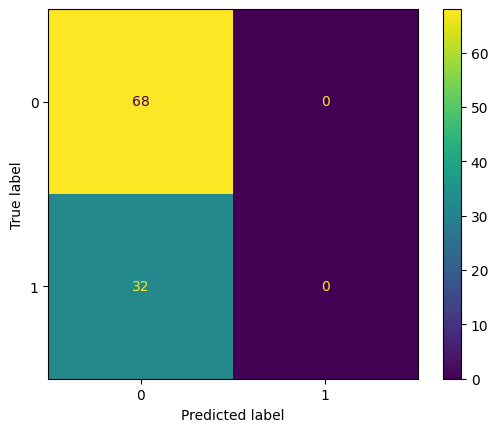

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=(confusion_matrix(y_test,predictions)),display_labels=logmodel.classes_)
disp.plot()
plt.show()

## Use StandardScaler() to improved performance and re-train your model

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train

array([[ 0.60603081, -0.9027491 ],
       [-0.54012675,  1.47580428],
       [ 0.03295203, -0.57973568],
       [-0.54012675,  1.91627713],
       [ 1.37013584, -1.43131652],
       [ 1.46564897,  1.00596657],
       [ 0.12846516, -0.81465453],
       [ 0.03295203, -0.25672226],
       [-0.15807423, -0.57973568],
       [-0.15807423, -0.19799255],
       [-0.25358736, -1.3138571 ],
       [-0.25358736, -0.57973568],
       [ 0.41500455,  0.09565602],
       [ 0.89257019, -0.60910054],
       [ 2.03872775, -1.19639767],
       [ 1.08359645, -0.13926283],
       [ 0.70154394,  1.7988177 ],
       [-0.63563988,  0.56549373],
       [ 0.79705706,  0.35993973],
       [ 0.89257019, -0.55037082],
       [-1.11320552, -1.60750566],
       [ 2.13424088,  0.94723686],
       [ 0.03295203,  1.24088543],
       [ 0.22397829,  1.09406114],
       [ 0.41500455, -0.49164111],
       [-0.25358736, -0.31545197],
       [ 0.98808332, -0.84401939],
       [ 0.98808332,  1.88691227],
       [ 0.03295203,

In [54]:
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [60]:
print('accuracy score',accuracy_score(y_test,predictions))
print('\nconfusion matrix\n',confusion_matrix(y_test,predictions))
print('\nclassification report\n',classification_report(y_test,predictions))

accuracy score 0.68

confusion matrix
 [[68  0]
 [32  0]]

classification report
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

[1]
